In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv('Country-data.csv')
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Converting exports, imports and health columns to actual values

In [3]:
df['exports'] = (df['exports']*df['gdpp'])/100


df['health'] = (df['health']*df['gdpp'])/100


df['imports'] = (df['imports']*df['gdpp'])/100


In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [5]:
# Checking for Null values in the data set
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Exploratory Data Analysis

In [7]:
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

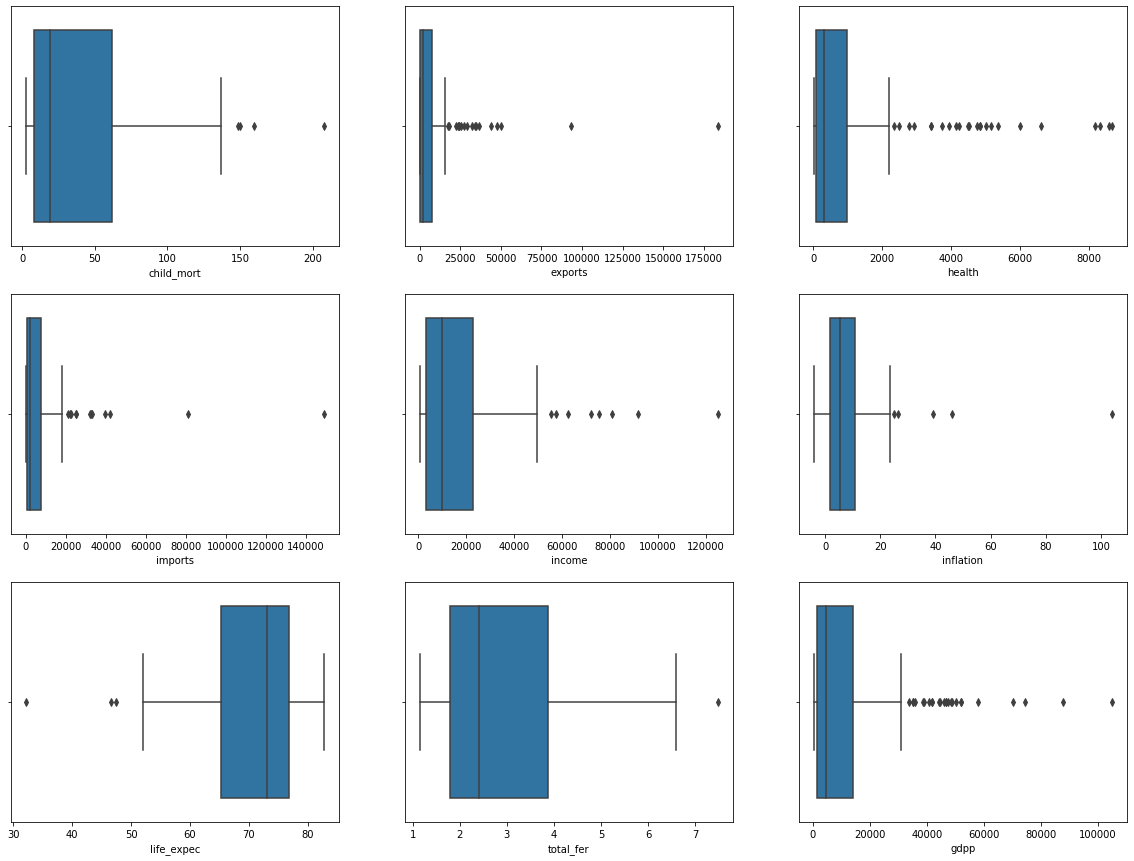

In [8]:
plt.figure(figsize=(20,15))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

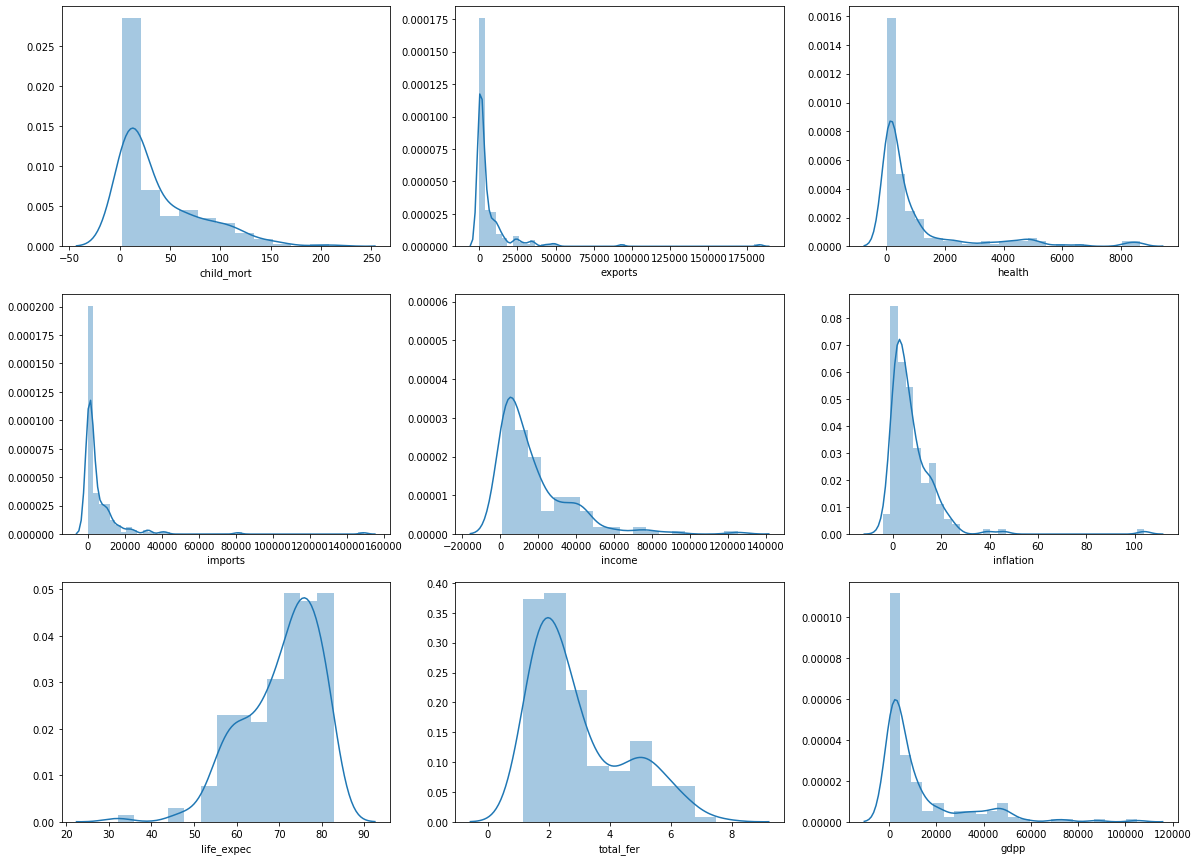

In [9]:
plt.figure(figsize=(20,15))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

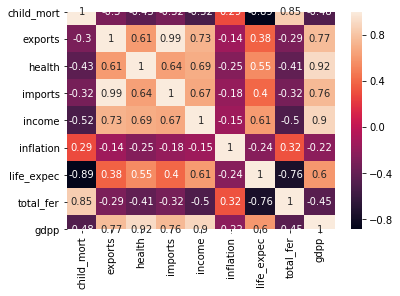

In [10]:
# checking correlation between the features

sns.heatmap(df.corr(), annot = True)
plt.show()

#### Outlier treatment
Capping the upper quartile range outliers

In [11]:
q1 = df['exports'].quantile(0.99)
q2 = df['health'].quantile(0.99)
q3 = df['imports'].quantile(0.99)
q4 = df['income'].quantile(0.99)
q5 = df['life_expec'].quantile(0.99)
q6 = df['total_fer'].quantile(0.99)
q7 = df['gdpp'].quantile(0.99)

print(q1)
print(q2)
print(q3)
print(q4)
print(q5)
print(q6)
print(q7)


64794.26000000014
8410.3304
55371.39000000013
84374.00000000003
82.37
6.563599999999999
79088.00000000004


In [12]:
df['exports'][df['exports']>=q1] = q1
df['health'][df['health']>=q2] = q2
df['imports'][df['imports']>=q3] = q3
df['income'][df['income']>=q4] = q4
df['life_expec'][df['life_expec']>=q5] = q5
df['total_fer'][df['total_fer']>=q6] = q6
df['gdpp'][df['gdpp']>=q7] = q7

In [13]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.781832,70.551138,2.942259,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,10.570704,8.886987,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,104.000000,82.370000,6.563600,79088.000000


## K-Means Clustering

Calculating the Hopkins statistic

In [14]:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [15]:
hopkins(df.drop('country',axis=1))

0.8789809298189895

We got the Hopkins statistic around 80%. So, it is good to perform Clustering on the given dataset

In [16]:
df1 = df.drop('country',axis = 1)
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0
163,17.1,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.47,13500.0
164,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0
165,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310.0


Scaling the features using standardization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [18]:
df1

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61970522,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64883094,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67140344,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28767096,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34435902,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09372771,
         1.64524315, -0.6500669 ]])

In [19]:
# converting the scaled variables array into a dataframe
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1::]

In [20]:
df1.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619705,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.648831,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671403,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179541,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705262,-0.543736,-0.032042
5,-0.591177,-0.403434,-0.123164,-0.449748,0.102912,1.244725,0.592400,-0.383077,-0.141376
6,-0.501643,-0.515633,-0.511083,-0.469903,-0.567361,-0.001123,0.310243,-0.838278,-0.548789
7,-0.832423,0.328439,1.947192,0.529458,1.370844,-0.628316,1.292147,-0.677619,2.252463
8,-0.844858,1.539528,2.298992,1.761154,1.471385,-0.655549,1.122853,-1.005631,1.964742
9,0.023128,-0.295850,-0.398109,-0.496491,-0.047899,0.571037,-0.163779,-0.684313,-0.398023


##### Silhouette score
Choosing no.of clusters to be formed by using Silhouette score

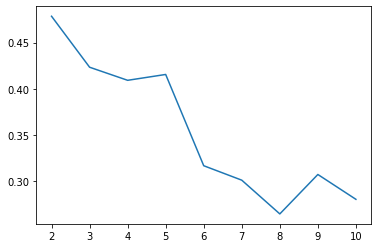

In [21]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k,silhouette_score(df1,kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])    
    

#### Elbow curve
choosing no.of Clusters using elbow curve

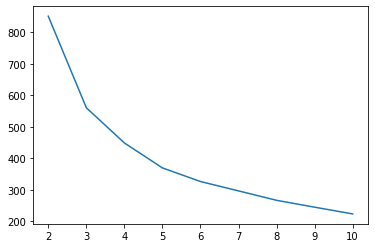

In [22]:
ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ssd.append([k,kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])    

We choose no.of clusters(K) = 3 from the Silhouette score and Elbow Curve

### Performing K-means clustering

In [23]:
kmeans = KMeans(n_clusters = 3, random_state = 50).fit(df1)
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [24]:
label = pd.DataFrame(kmeans.labels_, columns = ['label'])

In [25]:
df_kmean = df.copy()

In [26]:
df_kmean = pd.concat([df_kmean,label], axis = 1)

In [27]:
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [28]:
df_kmean.label.value_counts()

0    92
1    48
2    27
Name: label, dtype: int64

##### Visualizing the clusters

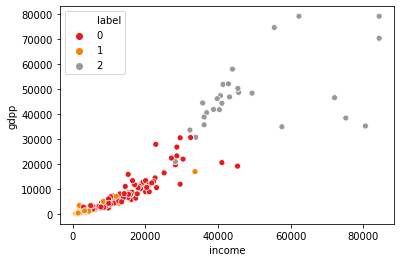

In [29]:
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')

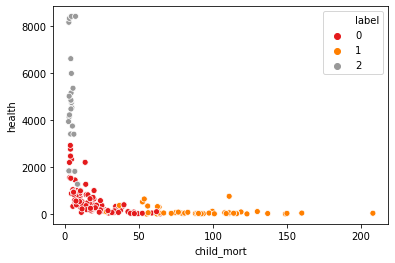

In [30]:
sns.scatterplot(x = 'child_mort', y = 'health', hue = 'label', data = df_kmean, palette = 'Set1')

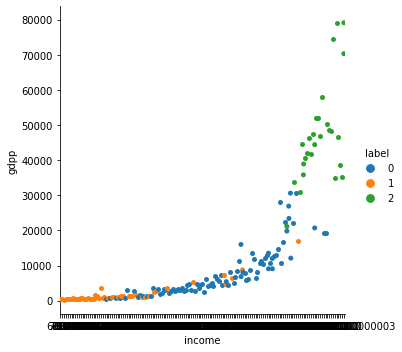

In [31]:
sns.catplot(x="income", y="gdpp", hue = 'label', data=df_kmean)

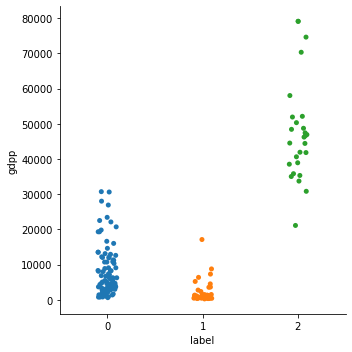

In [32]:
sns.catplot(x="label", y="gdpp", hue = 'label', data=df_kmean)

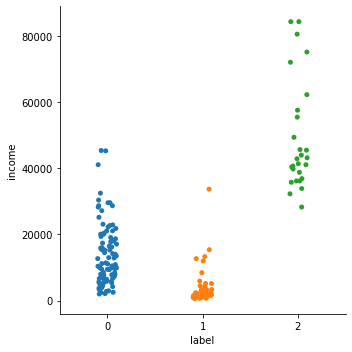

In [33]:
sns.catplot(x="label", y="income", hue = 'label', data=df_kmean)

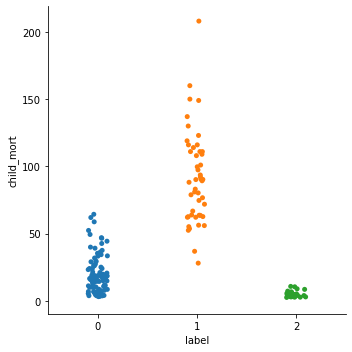

In [34]:
sns.catplot(x="label", y= "child_mort", hue = 'label', data=df_kmean)

#### Cluster Profiling

In [35]:
df_kmean.drop('country', axis = 1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.972233,1909.208333
2,5.092593,26440.026667,4363.327807,22045.851111,49057.333333,3.120407,80.434815,1.775185,47476.888889


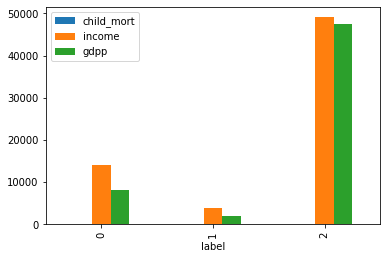

In [36]:
df_kmean.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind='bar')

In [37]:
df_kmean[df_kmean['label']==0].sort_values(by =['child_mort', 'gdpp'], ascending = [False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720.0,7.040,66.8,2.41,988.0,0
154,Turkmenistan,62.0,3387.72000,111.0000,1975.800000,9940.0,2.310,67.9,2.83,4440.0,0
69,India,58.8,305.10000,54.6750,365.850000,4410.0,8.980,66.2,2.60,1350.0,0
146,Tajikistan,52.4,109.96200,44.1324,432.468000,2110.0,12.500,69.6,3.51,738.0,0
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.140,70.4,2.33,758.0,0
...,...,...,...,...,...,...,...,...,...,...,...
122,Portugal,3.9,6727.50000,2475.0000,8415.000000,27200.0,0.643,79.8,1.39,22500.0,0
60,Greece,3.9,5944.90000,2770.7000,8258.300000,28700.0,0.673,80.4,1.48,26900.0,0
139,Spain,3.8,7828.50000,2928.7800,8227.600000,32500.0,0.160,81.9,1.37,30700.0,0
43,Czech Republic,3.4,13068.00000,1560.2400,12454.200000,28300.0,-1.430,77.5,1.51,19800.0,0


In [38]:
df_kmean[df_kmean['label']==0].sort_values(by =['income', 'gdpp'], ascending = [True,False])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
109,Nepal,47.0,56.7136,31.0800,215.488,1990.0,15.10,68.3,2.61,592.0,0
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110.0,12.50,69.6,3.51,738.0,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440.0,7.14,70.4,2.33,758.0,0
27,Cambodia,44.4,425.2260,44.6448,467.670,2520.0,3.12,66.1,2.88,786.0,0
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790.0,10.00,68.5,3.10,880.0,0
...,...,...,...,...,...,...,...,...,...,...,...
138,South Korea,4.1,10917.4000,1531.5300,10210.200,30400.0,3.16,80.1,1.23,22100.0,0
139,Spain,3.8,7828.5000,2928.7800,8227.600,32500.0,0.16,81.9,1.37,30700.0,0
11,Bahrain,8.6,14386.5000,1028.7900,10536.300,41100.0,7.44,76.0,2.16,20700.0,0
115,Oman,11.7,12680.1000,534.6100,7951.600,45300.0,15.60,76.1,2.90,19300.0,0


In [39]:
df_kmean[df_kmean['label']==1].sort_values(by =['child_mort', 'gdpp'], ascending = [False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.2860,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,1
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,1
97,Mali,137.0,161.4240,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0,1
113,Nigeria,130.0,589.4900,118.1310,405.420,5150.0,104.000,60.5,5.8400,2330.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,1


In [40]:
df_kmean[df_kmean['label']==1].sort_values(by =['income', 'gdpp'], ascending = [True,False])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.0200,327.0,1
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.5600,419.0,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.3100,459.0,1
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.100,58.0,5.3400,648.0,1
150,Togo,90.3,196.1760,37.3320,279.624,1210.0,1.180,58.7,4.8700,488.0,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,1


In [41]:
df_kmean[df_kmean['label']==2].sort_values(by =['child_mort', 'gdpp'], ascending = [False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
82,Kuwait,10.8,25679.50,1012.5500,11704.00,75200.0,11.200,78.20,2.21,38500.0,2
23,Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.700,77.10,1.84,35300.0,2
123,Qatar,9.0,43796.90,1272.4300,16731.40,84374.0,6.980,79.50,2.07,70300.0,2
157,United Arab Emirates,8.6,27195.00,1281.0000,22260.00,57600.0,12.500,76.50,1.87,35000.0,2
159,United States,7.3,6001.60,8410.3304,7647.20,49400.0,1.220,78.70,1.93,48400.0,2
98,Malta,6.8,32283.00,1825.1500,32494.00,28300.0,3.830,80.30,1.36,21100.0,2
111,New Zealand,6.2,10211.10,3403.7000,9436.00,32300.0,3.730,80.90,2.17,33700.0,2
29,Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.870,81.30,1.63,47400.0,2
158,United Kingdom,5.2,10969.80,3749.9600,11981.20,36200.0,1.570,80.30,1.92,38900.0,2
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.160,82.00,1.93,51900.0,2


From the above Clustering method we can divide the countries into three clusters.

child_mort:

Child mortality is quite in the countries which belongs to the Cluster-1
Child mortaity is moderate in the countries belongs to Cluster-0
Child mortality is quite low in the countries belongs to Cluster-2 compared to the others

income:

Income of a person is quite in the countries which belongs to the Cluster-1
Income of a person is moderate in the countries belomgs to Cluster-0
Income of a person is quite low in the countries belongs to Cluster-2 compared to the others

gdpp:

gdpp is quite in the countries which belongs to the Cluster-1
gdpp is moderate in the countries belomgs to Cluster-0
gdpp is quite low in the countries belongs to Cluster-2 compared to the others

From the above K-Means clustering exercise we can chose the below countries as that are in need for the aid

1. Central African Republic

2. Congo, Dem. Rep

3. Haiti

4. Sierra Leone

5. Niger	

## Hierarchial Clustering

In [42]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619705,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.648831,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671403,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179541,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705262,-0.543736,-0.032042


In [43]:
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


##### Clustering by using Single Linkage method

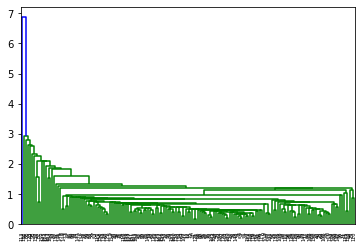

In [44]:
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Clustering by using Complete Linkage method

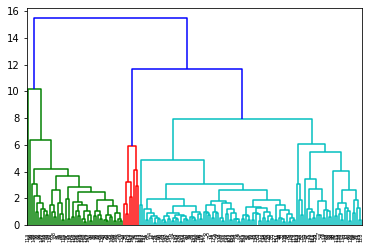

In [45]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

From the dendrogram we get two clusters using COMPLETE DISTANCE METHOD

In [46]:
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [47]:
# assign cluster labels
df_kmean['cluster_labels'] = cluster_labels
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


In [48]:
df_kmean = df_kmean.drop('label', axis=1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


#### Cluster profiling and visualization using income, child_mort, gdpp

In [49]:
df_kmean[df_kmean['cluster_labels'] == 0].sort_values(by =['child_mort', 'gdpp'], ascending = [False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
66,Haiti,208.0,101.2860,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0
97,Mali,137.0,161.4240,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0,0
113,Nigeria,130.0,589.4900,118.1310,405.420,5150.0,104.000,60.5,5.8400,2330.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,0


In [50]:
df_kmean[df_kmean['cluster_labels'] == 0].sort_values(by =['income', 'gdpp'], ascending = [True,False])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.0200,327.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.5600,419.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.3100,459.0,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.100,58.0,5.3400,648.0,0
150,Togo,90.3,196.1760,37.3320,279.624,1210.0,1.180,58.7,4.8700,488.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,0


In [51]:
df_kmean[df_kmean['cluster_labels'] == 1].sort_values(by =['child_mort', 'gdpp'], ascending = [False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720.0,7.040,66.80,2.41,988.0,1
154,Turkmenistan,62.0,3387.72000,111.0000,1975.800000,9940.0,2.310,67.90,2.83,4440.0,1
69,India,58.8,305.10000,54.6750,365.850000,4410.0,8.980,66.20,2.60,1350.0,1
146,Tajikistan,52.4,109.96200,44.1324,432.468000,2110.0,12.500,69.60,3.51,738.0,1
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.140,70.40,2.33,758.0,1
...,...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,17879.40000,4134.9000,17278.800000,39800.0,0.351,80.00,1.87,46200.0,1
144,Sweden,3.0,24070.20000,5017.2300,21204.700000,42900.0,0.991,81.50,1.98,52100.0,1
133,Singapore,2.8,64794.26000,1845.3600,55371.390000,72100.0,-0.046,82.37,1.15,46600.0,1
91,Luxembourg,2.8,64794.26000,8158.5000,55371.390000,84374.0,3.620,81.30,1.63,79088.0,1


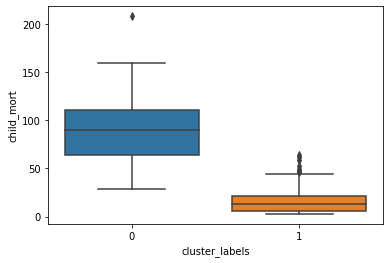

In [52]:
# visualizing the clusters
sns.boxplot(x='cluster_labels', y='child_mort', data=df_kmean)

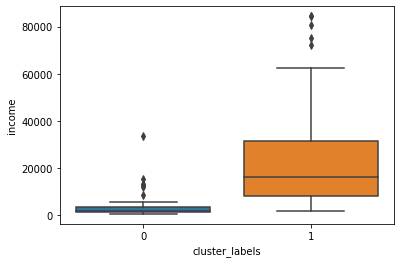

In [53]:
sns.boxplot(x='cluster_labels', y='income', data=df_kmean)

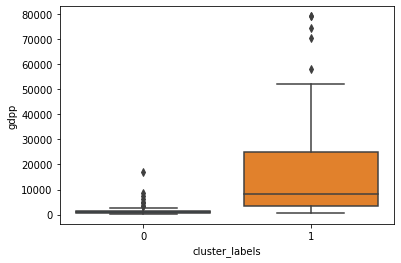

In [54]:
sns.boxplot(x='cluster_labels', y='gdpp', data=df_kmean)

By using the complete linkage method in Hierarchial clustering we can divide the dataset into two clusters.

child_mort:

The median of child mortality rate in the countries belongs to Cluster-0 is 100
The median of child mortality rate in the countries belongs to Cluster-1 is around 20

Income:

The median of income in the countries belongs to Cluster-0 is quite low compared to countries in Cluster-1

gdpp:

The gdpp of income in the countries belongs to Cluster-0 is quite low compared to countries in Cluster-1

From the above Hierarchial clustering exercise using complete linkage method we can chose the below countries as that are in need for the aid

1. Sierra Leone

2. Central African Republic

3. Niger

4. Congo, Dem. Rep.

5. Liberia